In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [75]:
df = pd.read_csv('iris.data', sep=',', 
                   header=None,  # the data file does not contain a header
                   names=['sepal length','sepal width','petal length','petal width','class'] # names of columns
                  )

df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
df.groupby('class')

In [56]:
iris_grouped = df.groupby('class')
iris_grouped.groups

{'Iris-setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 'Iris-versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 'Iris-virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

In [60]:
iris_grouped.mean()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [59]:
iris_grouped.median()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [61]:
def longest_petal(g):
    return g.loc[g['petal length'].idxmax()]

iris_grouped.apply(longest_petal)

,sepal length,sepal width,petal length,petal width,class
class,,,,,
Iris-setosa,4.8,3.4,1.9,0.2,Iris-setosa
Iris-versicolor,6.0,2.7,5.1,1.6,Iris-versicolor
Iris-virginica,7.7,2.6,6.9,2.3,Iris-virginica


In [62]:
df.groupby('class')['petal length'].mean()

class
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal length, dtype: float64

In [63]:
df.groupby('class')[['petal length','sepal length']].aggregate(['min', np.mean, max])

petal length             sepal length            
                         min   mean  max          min   mean  max
class                                                            
Iris-setosa              1.0  1.464  1.9          4.3  5.006  5.8
Iris-versicolor          3.0  4.260  5.1          4.9  5.936  7.0
Iris-virginica           4.5  5.552  6.9          4.9  6.588  7.9

In [64]:
df.groupby('class')[['petal length','sepal length']].aggregate(['min', 'mean', 'max'])

petal length             sepal length            
                         min   mean  max          min   mean  max
class                                                            
Iris-setosa              1.0  1.464  1.9          4.3  5.006  5.8
Iris-versicolor          3.0  4.260  5.1          4.9  5.936  7.0
Iris-virginica           4.5  5.552  6.9          4.9  6.588  7.9

In [72]:
df['class'] = df['class'].astype("category").cat.codes
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [73]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

Text(0, 0.5, 'sepal width')

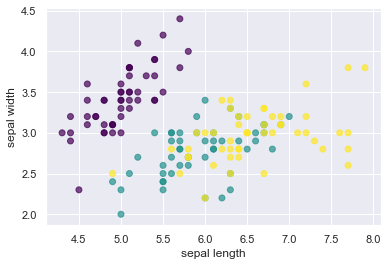

In [74]:
plt.scatter(df['sepal length'], df['sepal width'], alpha=0.7, 
            c=df['class'], cmap='viridis')
plt.xlabel(df.columns.values[0])
plt.ylabel(df.columns.values[1])

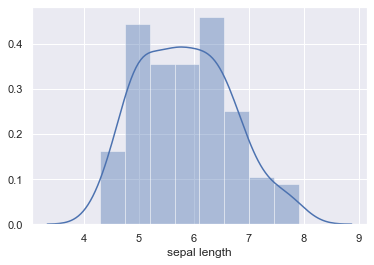

In [71]:
sns.distplot(df['sepal length'])

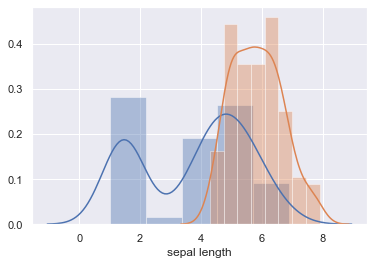

In [70]:
sns.distplot(df['petal length'])
sns.distplot(df['sepal length'])

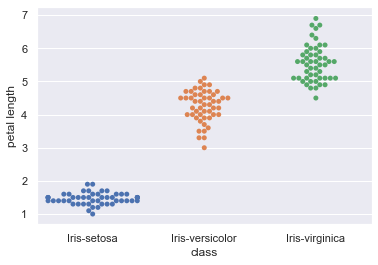

In [69]:
sns.swarmplot(x=df['class'], y=df['petal length'], data=df)

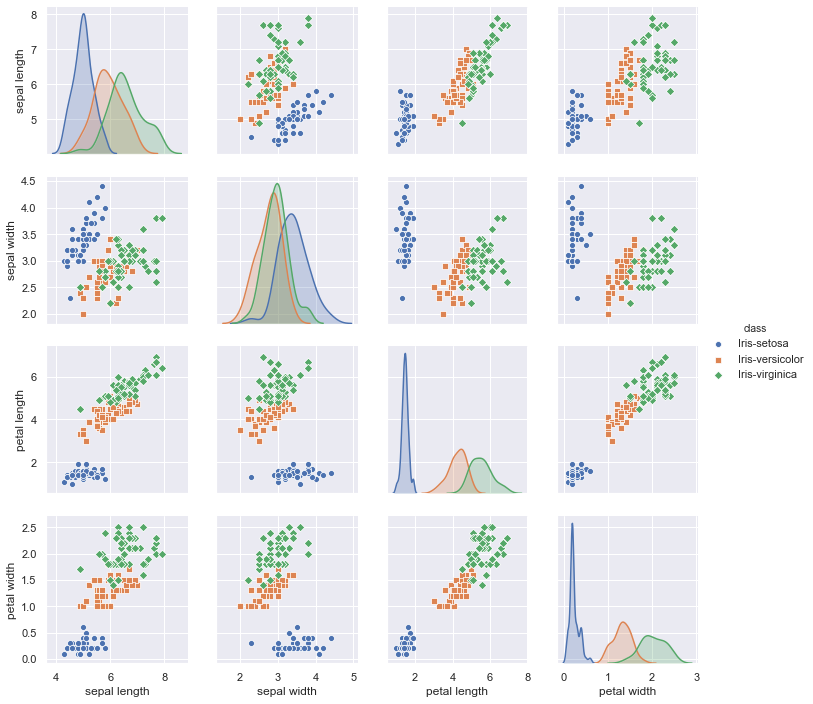

In [68]:
sns.pairplot(df, hue="class", diag_kind = 'kde', markers=["o", "s", "D"])

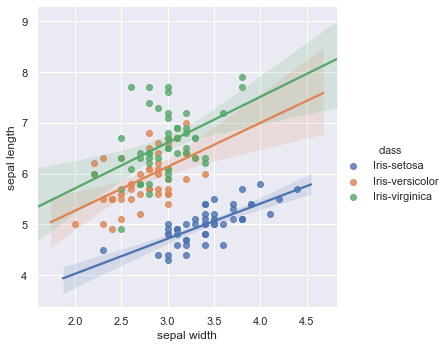

In [76]:
s = sns.lmplot(x='sepal width', y= 'sepal length', hue="class", data=df)

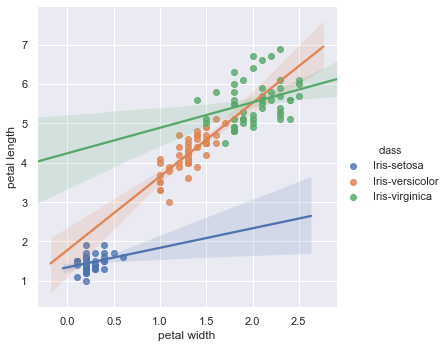

In [78]:
p = sns.lmplot(x='petal width', y= 'petal length', hue="class", data=df)

In [79]:
X = np.array(df.iloc[:, 0:4])
y = np.array(df['class'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [83]:
# Create KNN classifier
neighbors = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
#show first 5 model predictions on the test data
neighbors.predict(X_test)[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [85]:
neighbors.score(X_test, y_test)

0.9555555555555556

In [86]:
(y_test == neighbors.predict(X_test)).sum()

43

In [87]:
k_value = [1, 3, 5, 7, 10, 20, 30, 40, 50]


pred_sum = 0
Avg = {}


for k in k_value:
    scores = []
    for i in range(10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size= 0.3)
        neighbors2 = KNeighborsClassifier(n_neighbors = k)
        neighbors2.fit(X2_train, y2_train)        
        accuracy = neighbors2.score(X2_test, y2_test)
        scores.append(accuracy)     
        
    
        
    for j in range(len(scores)):
        pred_sum = pred_sum + scores[j]
    Avg[k] = pred_sum/10
    pred_sum = 0
print(Avg)
        
    
        

{1: 0.9377777777777778, 3: 0.9577777777777777, 5: 0.9622222222222222, 7: 0.968888888888889, 10: 0.968888888888889, 20: 0.9488888888888889, 30: 0.9488888888888889, 40: 0.9311111111111112, 50: 0.8799999999999999}


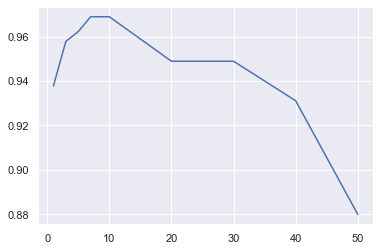

In [88]:
lists = sorted(Avg.items()) 

x, y = zip(*lists) 

plt.plot(x, y)
plt.show()